## Carga de paquetes relevantes

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion()

## Creacion de datos 'sinteticos' sin ruido

In [15]:
ti = 0
tf = 10
Fs = 100
t = np.linspace(ti, tf, np.round((tf-ti)*(Fs)))

In [16]:
A = 1
gamma = 0.2
f = 1
w = 2*np.pi*f
phi = 0
D = 3

yp = A*np.exp(-gamma*t)*np.cos(w*t+phi)+D

<IPython.core.display.Javascript object>


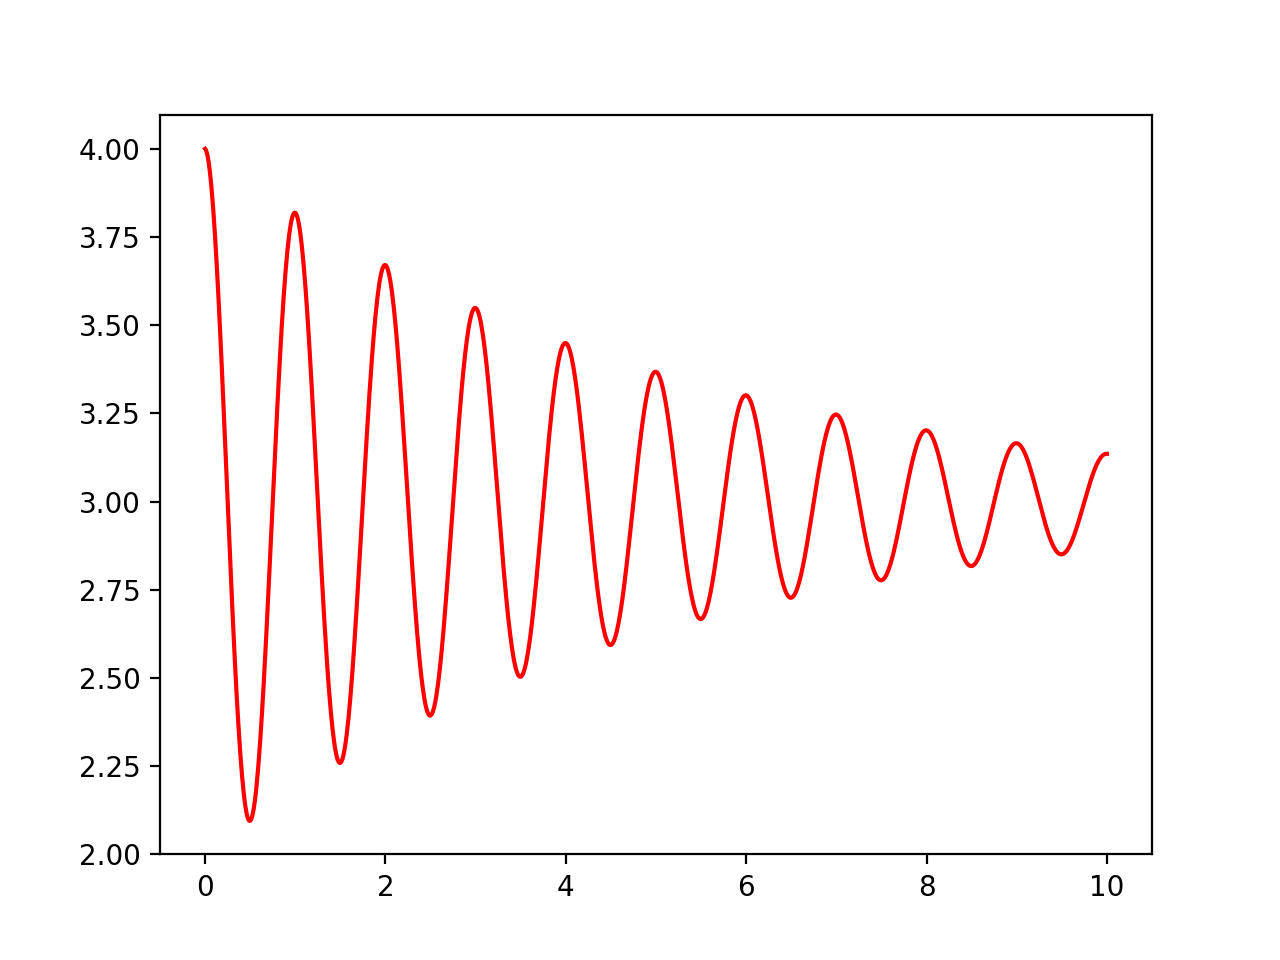

In [17]:
plt.figure()
plt.plot(t,yp,'r-')

## Agregado de ruido (siempre presente en la experiencia!)

In [18]:
ruido = np.random.randn(len(yp))

In [19]:
y = yp + 0.025*ruido

<IPython.core.display.Javascript object>


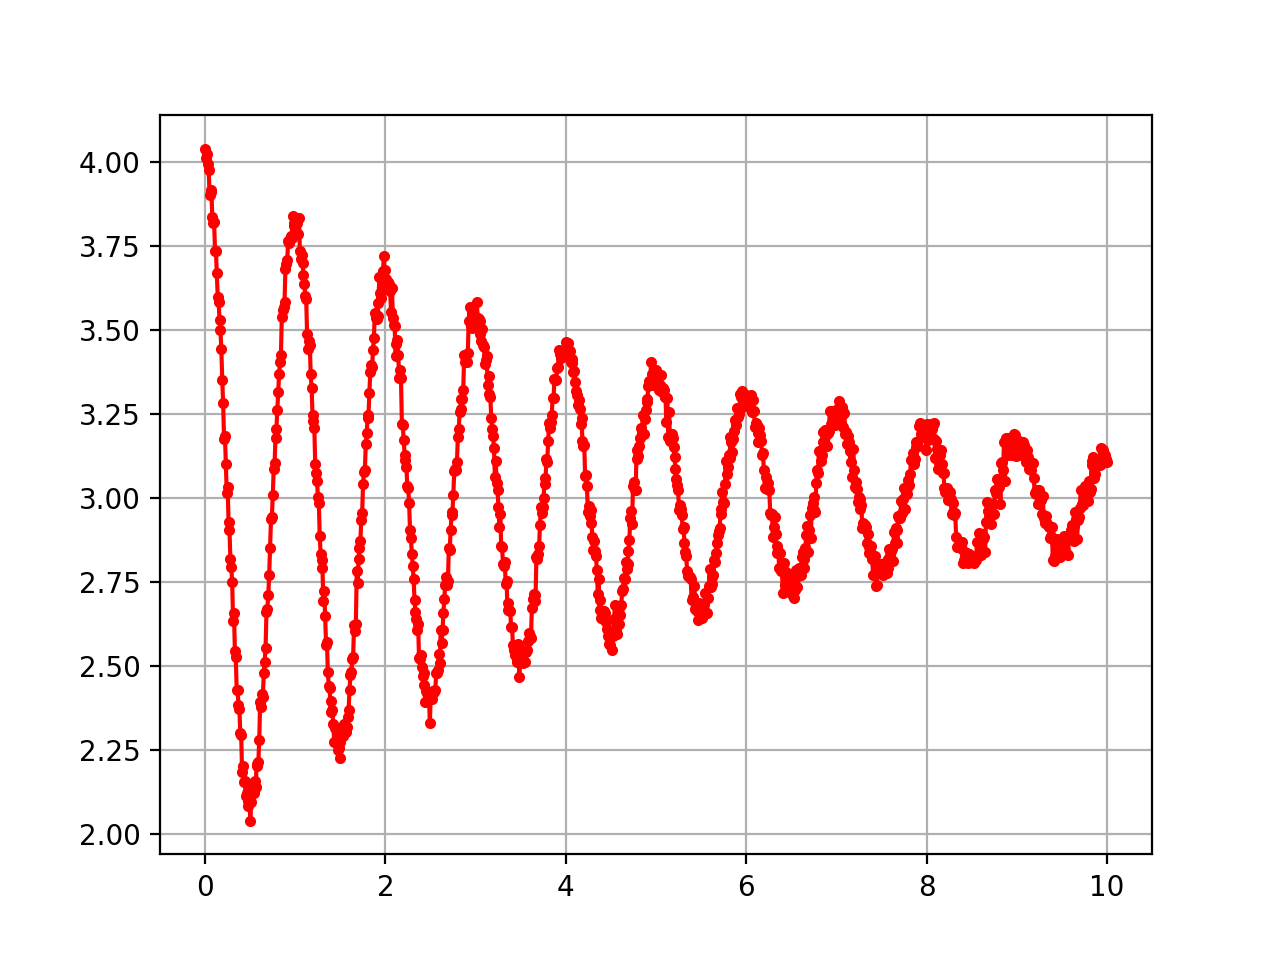

In [20]:
plt.figure()
plt.plot(t,y,'r.-')
plt.grid('on')

## Una estrategia para la deteccion de picos

In [21]:
def media_movil(t,y,HW):
    """
    Calculo de la media movil 
    """
    N = np.size(y)
    W = np.round(2*HW).astype(int)
    
    ymm = np.zeros(N-2*HW)
    tmm = np.zeros(N-2*HW)
    
    for i in np.arange(HW,N-HW):
        ymm[i-HW] = np.mean( y[i-HW:i+HW] )
        tmm[i-HW] = t[i]
        
    return tmm, ymm

In [22]:
tmm, ymm = media_movil(t,y,20)
len(ymm)

960

<IPython.core.display.Javascript object>


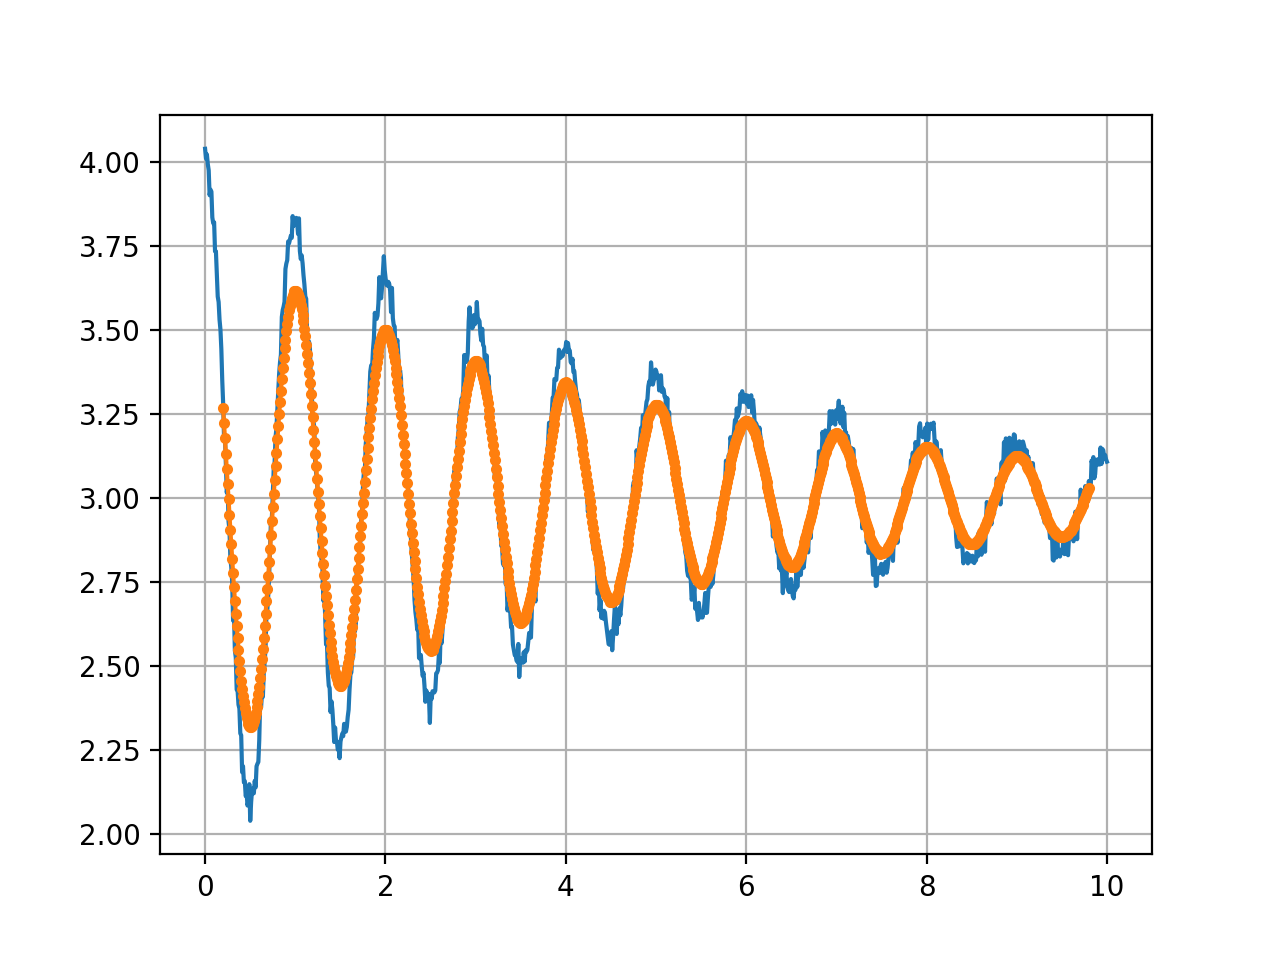

In [23]:
plt.figure()
plt.plot(t,y)
plt.plot(tmm,ymm,'.-')
plt.grid('on')

In [24]:
def hallar_picos(to,yo,HW,Npasadas=1):
    
    tS = to
    yS = yo
    
    for i in range(Npasadas):
        tS, yS = media_movil(tS,yS,HW)
    
    tp = np.empty((0, 1))
    yp = np.empty((0, 1))
    
    for i in range(1,len(yS)-1):
        if (yS[i-1] < yS[i] ) & (yS[i] > yS[i+1]):
            idx = np.where(to==tS[i])
            tp = np.append(tp, [to[idx]])
            yp = np.append(yp, [yo[idx]])
    
    return tp, yp

In [25]:
tp, yp = hallar_picos(t,y,10,2)

<IPython.core.display.Javascript object>


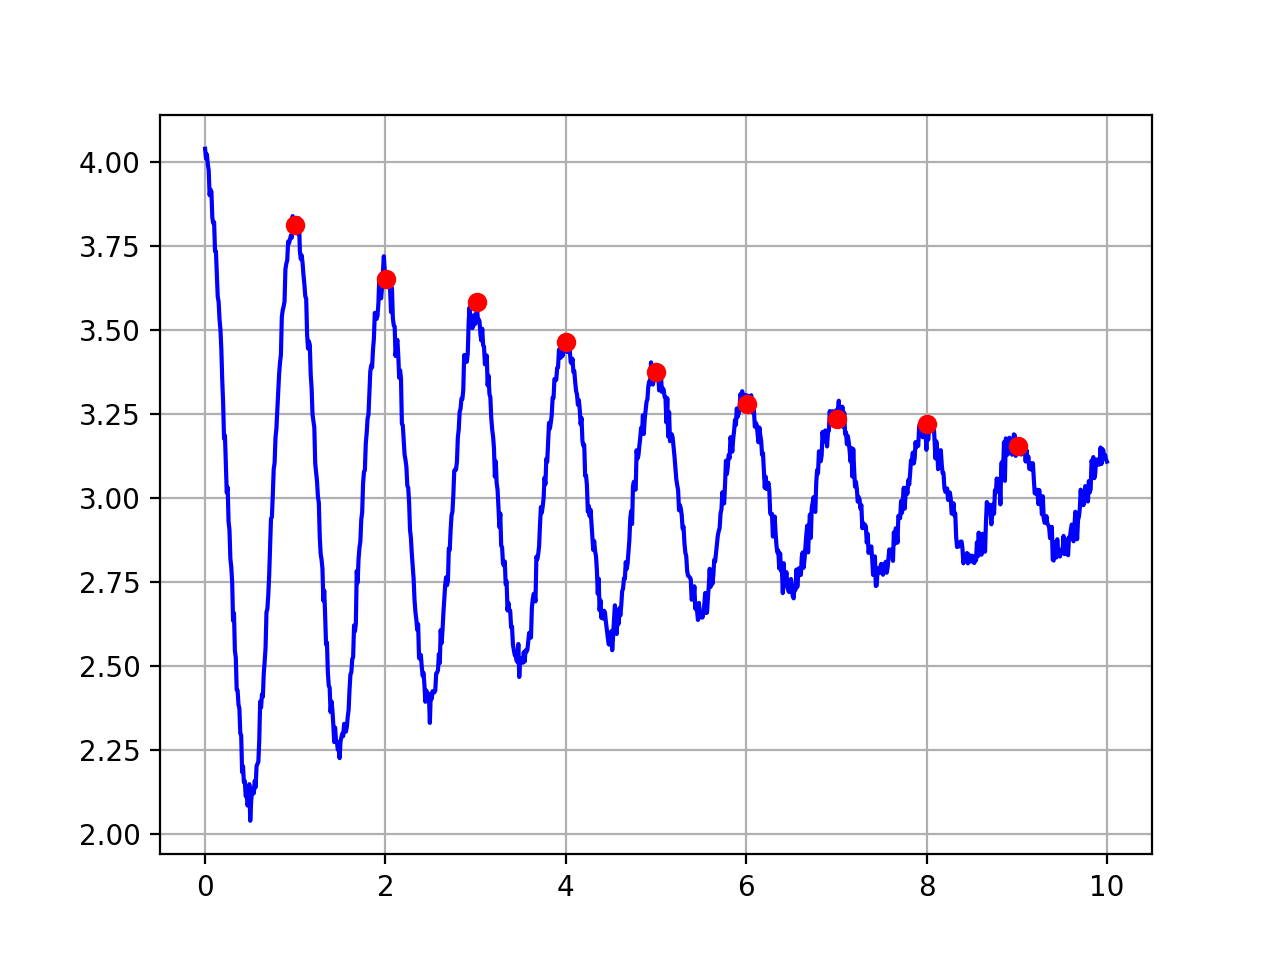

In [26]:
plt.figure()
plt.plot(t,y,'b-')
plt.plot(tp,yp,'ro')
plt.grid('on')